## Words that trend up

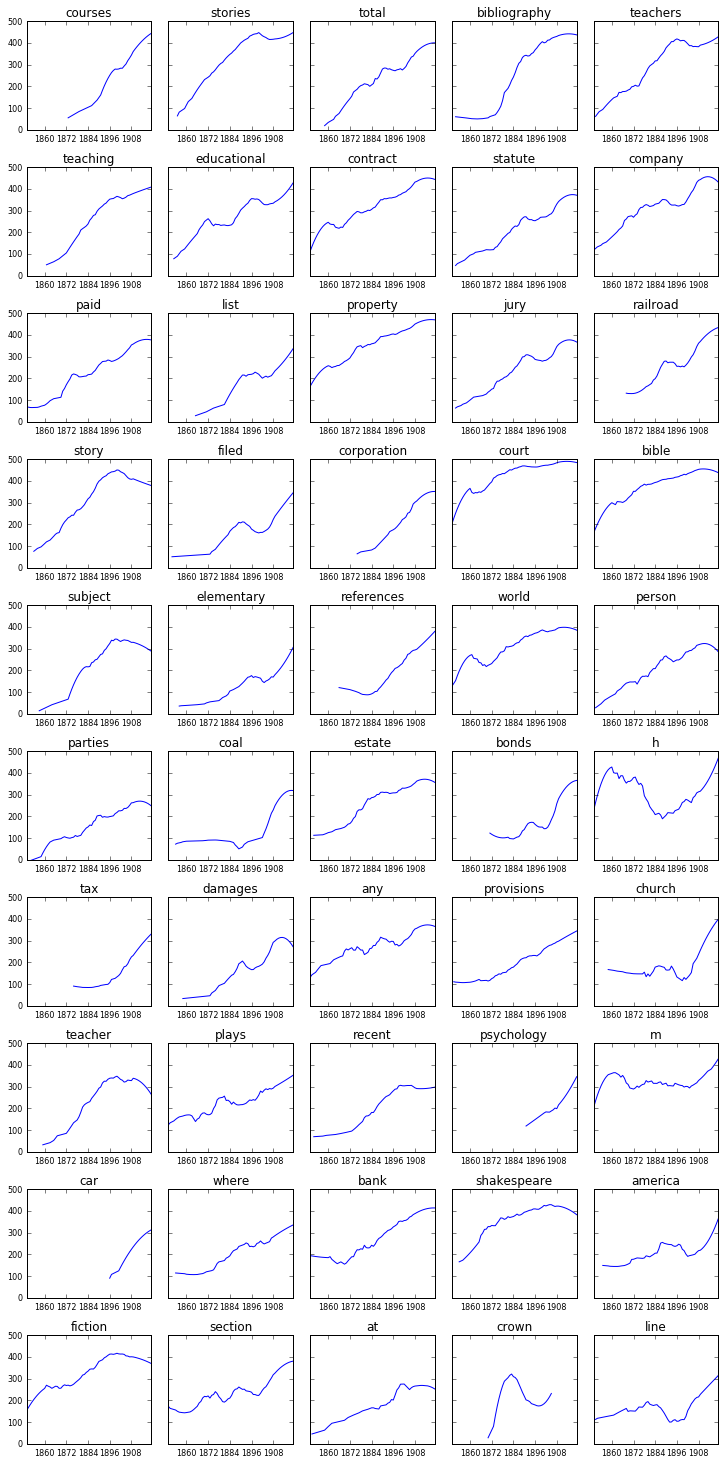

In [3]:
import numpy as np

from hol.topn_series import TopnSeries

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

years = range(1850, 1920)
depth = 500

topns = TopnSeries(years, depth)

def print_query(_lambda):
    
    result = topns.sort(_lambda)
    topn = list(result.items())[:50]
    
    y1 = list(years)[0]
    y2 = list(years)[-1]
    
    fig, axarr = plt.subplots(10, 5, figsize=(10, 20), sharey='row')
    fig.tight_layout(pad=0, h_pad=2, w_pad=0.1)
    
    for i, row in enumerate(axarr):
        for j, ax in enumerate(row):
            
            t, (s, v) = topn[(i*5)+j]
            ax.set_title(t)
            ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
            ax.tick_params(labelsize=8)
            ax.set_xlim(y1, y2)
            ax.set_ylim(0, depth)
            ax.plot(*zip(*s.items()))

def score(s):
    y = list(s.values())
    return y[-1] - y[0]

print_query(score)